In [28]:
import os

from CSIKit.reader import get_reader
from CSIKit.util import csitools

from os import listdir, mkdir
from os.path import isfile, join
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
def getCsiMatrFromPcap(fileName: str, CsiFilesFolder: str) -> pd.DataFrame:
    pcapFilePath = join(CsiFilesFolder, fileName)
    my_reader = get_reader(pcapFilePath)
    csi_data = my_reader.read_file(pcapFilePath, scaled=False)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
    csi_matrix = csi_matrix[:, :, 0, 0]
    csi_matrix = pd.DataFrame(csi_matrix)
    return csi_matrix


def getCsiMatrFromCsv(fileName: str, CsiFilesFolder: str) -> pd.DataFrame:
    csvFilePath = join(CsiFilesFolder, fileName)
    return pd.read_csv(csvFilePath)

def upload2Dataset(csi_dict: {str: pd.DataFrame}, csi_cvs_folder: str = "dataset", csvFileName: str = ""):
    # fileName == "fileName.csv"
    csi_cvs_folder = csi_cvs_folder
    if isinstance(csi_dict, pd.DataFrame):
        csi_dict.to_csv(join(csi_cvs_folder, csvFileName), index=False)
        return

    for fileName in csi_dict:
        csvFileName = fileName[:-3] + "csv"
        csi_dict[fileName].to_csv(join(csi_cvs_folder, csvFileName), index=False)

def getCsiDictFromDataset(dataset_folder: str = "dataset") -> {str: pd.DataFrame}:
    csi_dict: {str: pd.DataFrame} = dict()
    csiFiles = [fileName for fileName in listdir(dataset_folder) if isfile(join(dataset_folder, fileName))]
    for idx, fileName in enumerate(csiFiles):
        csi_matrix = getCsiMatrFromCsv(fileName, dataset_folder)
        # csi_matrix.head(2)
        csi_dict[fileName] = csi_matrix
    return csi_dict

In [30]:
csi_data_folder = "CSICapturedFiles/csi_data_test"
csiFiles = [fileName for fileName in listdir(csi_data_folder) if isfile(join(csi_data_folder, fileName))]
csi_dict: {str: pd.DataFrame} = dict()
for fileName in csiFiles:
    csi_matrix = getCsiMatrFromPcap(fileName, csi_data_folder)
    # csi_matrix.head(2)
    csi_dict[fileName] = csi_matrix



# csi_dict
# NEXBeamformReader.read_bfee

In [31]:
csi_matrix

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,15.314789,78.453037,13.97940,21.139434,15.682017,17.853298,14.623980,11.139434,20.000000,20.681859,...,6.020600,20.000000,20.863598,15.314789,13.010300,10.000000,18.061800,15.563025,18.061800,10.000000
1,6.989700,78.453037,21.61368,15.682017,12.304489,22.304489,19.138139,22.041200,3.010300,15.682017,...,18.633229,-inf,11.139434,0.000000,15.682017,6.989700,6.989700,17.242759,12.041200,14.149733
2,18.061800,78.453037,10.00000,11.139434,17.160033,23.521825,20.043214,0.000000,23.541084,0.000000,...,12.304489,26.273659,20.000000,20.000000,17.160033,18.129134,13.010300,12.041200,13.010300,18.129134
3,13.979400,78.453037,19.08485,16.020600,20.969100,26.074550,15.682017,15.051500,16.020600,18.325089,...,13.010300,17.634280,12.041200,12.041200,27.986506,24.668676,22.855573,13.979400,3.010300,16.989700
4,23.053514,78.453037,17.63428,11.139434,20.863598,14.149733,19.912261,13.979400,16.020600,17.853298,...,24.345689,0.000000,21.702617,24.424798,23.384565,12.552725,17.634280,16.127839,15.682017,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
477,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
478,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
479,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


### service subcarriers extracting

In [32]:
# service subcarriers
trashSubcarriers = np.array([0, 1] + list(range(123, 134)) + [255])
print("service subcarriers:", trashSubcarriers)

for fileName in csi_dict:
    csi_dict[fileName] = csi_dict[fileName].drop(columns=trashSubcarriers)

service subcarriers: [  0   1 123 124 125 126 127 128 129 130 131 132 133 255]


In [33]:
fileName = list(csi_dict.keys())[0]
csi_matrix = csi_dict[fileName]
csi_matrix

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,13.97940,21.139434,15.682017,17.853298,14.623980,11.139434,20.000000,20.681859,11.139434,13.979400,...,6.989700,6.020600,20.000000,20.863598,15.314789,13.010300,10.000000,18.061800,15.563025,18.061800
1,21.61368,15.682017,12.304489,22.304489,19.138139,22.041200,3.010300,15.682017,19.294189,0.000000,...,19.542425,18.633229,-inf,11.139434,0.000000,15.682017,6.989700,6.989700,17.242759,12.041200
2,10.00000,11.139434,17.160033,23.521825,20.043214,0.000000,23.541084,0.000000,18.633229,23.443923,...,19.294189,12.304489,26.273659,20.000000,20.000000,17.160033,18.129134,13.010300,12.041200,13.010300
3,19.08485,16.020600,20.969100,26.074550,15.682017,15.051500,16.020600,18.325089,17.634280,22.504200,...,6.989700,13.010300,17.634280,12.041200,12.041200,27.986506,24.668676,22.855573,13.979400,3.010300
4,17.63428,11.139434,20.863598,14.149733,19.912261,13.979400,16.020600,17.853298,22.944662,23.180633,...,24.969296,24.345689,0.000000,21.702617,24.424798,23.384565,12.552725,17.634280,16.127839,15.682017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
477,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
478,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
479,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


### uploading csi amplitude matrices into csv files

In [34]:
import shutil

csi_cvs_folder = "dataset_test"
shutil.rmtree(csi_cvs_folder)
os.mkdir(csi_cvs_folder)

for fileName in csi_dict:
    csvFileName = fileName[:-4] + "csv"
    csi_dict[fileName].to_csv(join(csi_cvs_folder, csvFileName), index=False)

## Download csi_dict

In [35]:
filesLen = pd.DataFrame(columns=["FileName", "FileLen"])
dataset_folder = "dataset_test"
csiFiles = [fileName for fileName in listdir(dataset_folder) if isfile(join(dataset_folder, fileName))]
csi_dict: {str: pd.DataFrame} = dict()
for idx, fileName in enumerate(csiFiles):
    csi_matrix = getCsiMatrFromCsv(fileName, dataset_folder)
    # csi_matrix.head(2)
    csi_dict[fileName] = csi_matrix
    filesLen.loc[idx] = [fileName, csi_matrix.shape[0]]

### Correlation matrix for first packet of each file

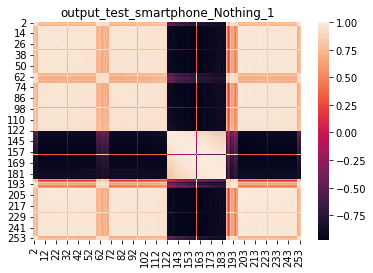

In [36]:
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    packet = csi_matrix.iloc[0]
    plt.title(fileName[:-4])
    sns.heatmap(csi_matrix.corr())
    # plt.savefig(f"pictures/files_correlation/dataset_correlation-matrix_{fileName[:-4]}.jpg", bbox_inches="tight")
    plt.show()

### file heatmap

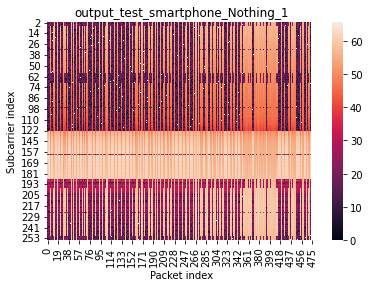

In [37]:
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    plt.title(fileName[:-4])
    sns.heatmap(csi_matrix.T, vmin=0, vmax=csi_matrix.values.max())
    plt.ylabel("Subcarrier index")
    plt.xlabel("Packet index")
    # plt.savefig(f"pictures/files_heatmap/dataset_heatmap_{fileName[:-4]}.jpg", bbox_inches="tight")
    plt.show()

### line plot of one(150-th) subcarriers

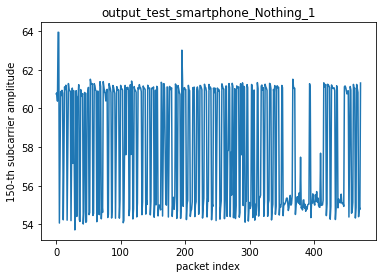

In [38]:
subcarrierIdx = 150
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    csi_matrix[str(subcarrierIdx)].plot.line()
    plt.title(fileName[:-4])
    plt.ylabel(f"{subcarrierIdx}-th subcarrier amplitude")
    plt.xlabel("packet index")
    # plt.savefig(f"pictures/files_line-plot_one_subcarrier/dataset_line-plot_{fileName[:-4]}.jpg", bbox_inches="tight")
    plt.show()

### line plot of 10 subcarriers

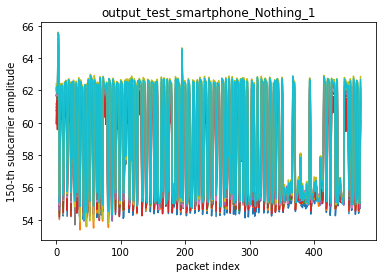

In [39]:
subcarrierIdxs = range(150, 160)
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    for idx in subcarrierIdxs:
        csi_matrix[str(idx)].plot.line()
    plt.title(fileName[:-4])
    plt.ylabel(f"{subcarrierIdx}-th subcarrier amplitude")
    plt.xlabel("packet index")
    # plt.savefig(f"pictures/files_line-plot_ten_subcarrier/dataset_line-plot_{fileName[:-4]}.jpg", bbox_inches="tight")
    plt.show()

### plot of one packet

<AxesSubplot:>

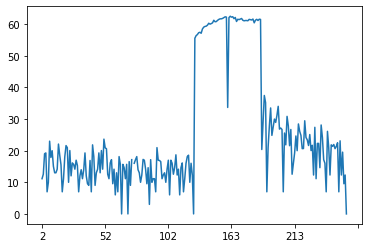

In [40]:
fileName = list(csi_dict.keys())[0]
csi_matrix = csi_dict[fileName]
packet = csi_matrix.iloc[39]
packet.plot.line()

<AxesSubplot:>

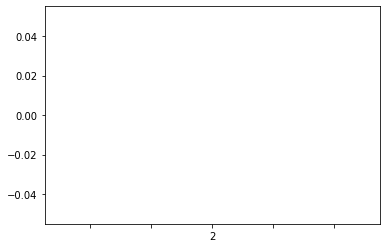

In [41]:
packet = csi_matrix.iloc[475]
packet.plot.line()

## Download csi_dict

In [42]:
dataset_folder = "dataset_test"
csi_dict = getCsiDictFromDataset(dataset_folder)

In [43]:
fileName = list(csi_dict.keys())[0]
csi_matrix = csi_dict[fileName]
csi_matrix

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,13.97940,21.139434,15.682017,17.853298,14.623980,11.139434,20.000000,20.681859,11.139434,13.979400,...,6.989700,6.020600,20.000000,20.863598,15.314789,13.010300,10.000000,18.061800,15.563025,18.061800
1,21.61368,15.682017,12.304489,22.304489,19.138139,22.041200,3.010300,15.682017,19.294189,0.000000,...,19.542425,18.633229,-inf,11.139434,0.000000,15.682017,6.989700,6.989700,17.242759,12.041200
2,10.00000,11.139434,17.160033,23.521825,20.043214,0.000000,23.541084,0.000000,18.633229,23.443923,...,19.294189,12.304489,26.273659,20.000000,20.000000,17.160033,18.129134,13.010300,12.041200,13.010300
3,19.08485,16.020600,20.969100,26.074550,15.682017,15.051500,16.020600,18.325089,17.634280,22.504200,...,6.989700,13.010300,17.634280,12.041200,12.041200,27.986506,24.668676,22.855573,13.979400,3.010300
4,17.63428,11.139434,20.863598,14.149733,19.912261,13.979400,16.020600,17.853298,22.944662,23.180633,...,24.969296,24.345689,0.000000,21.702617,24.424798,23.384565,12.552725,17.634280,16.127839,15.682017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
477,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
478,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
479,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


## PCA preparation

### change all NaN and +-inf values in file to median of corresponding packet or delete the packet if those values too much

In [44]:
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    # print(csi_matrix)
    csi_matrix.replace(np.inf, np.nan, inplace=True)
    csi_matrix.replace(-np.inf, np.nan, inplace=True)
    for idx in range(len(csi_matrix.index.values)):
        packet = csi_matrix.iloc[idx]
        stateMass = ((packet == np.nan) | (packet == np.inf) | (packet == -np.inf))
        stateMassSum = stateMass.sum()

        if 0 < stateMassSum < (0.3 * len(packet)):
            csi_matrix.iloc[idx].replace(np.nan, packet.mean(), inplace=True)
    csi_matrix.replace(np.nan, csi_matrix.mean(), inplace=True)
    csi_dict[fileName] = csi_matrix

In [45]:
fileName = list(csi_dict.keys())[0]
csi_matrix = csi_dict[fileName]
csi_matrix

,2,3,4,5,6,7,8,9,10,11,...,245,246,247,248,249,250,251,252,253,254
0,13.979400,21.139434,15.682017,17.853298,14.623980,11.139434,20.000000,20.681859,11.139434,13.979400,...,6.989700,6.020600,20.000000,20.863598,15.314789,13.010300,10.000000,18.061800,15.563025,18.061800
1,21.613680,15.682017,12.304489,22.304489,19.138139,22.041200,3.010300,15.682017,19.294189,0.000000,...,19.542425,18.633229,37.312031,11.139434,0.000000,15.682017,6.989700,6.989700,17.242759,12.041200
2,10.000000,11.139434,17.160033,23.521825,20.043214,0.000000,23.541084,0.000000,18.633229,23.443923,...,19.294189,12.304489,26.273659,20.000000,20.000000,17.160033,18.129134,13.010300,12.041200,13.010300
3,19.084850,16.020600,20.969100,26.074550,15.682017,15.051500,16.020600,18.325089,17.634280,22.504200,...,6.989700,13.010300,17.634280,12.041200,12.041200,27.986506,24.668676,22.855573,13.979400,3.010300
4,17.634280,11.139434,20.863598,14.149733,19.912261,13.979400,16.020600,17.853298,22.944662,23.180633,...,24.969296,24.345689,0.000000,21.702617,24.424798,23.384565,12.552725,17.634280,16.127839,15.682017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,28.321997,30.023764,30.609466,29.789810,36.127293,35.996188,35.817264,35.668103,35.776422,35.715331,...,37.088745,37.178825,37.312031,37.483471,36.684731,36.984210,29.570305,29.789174,30.341047,29.936720
477,28.321997,30.023764,30.609466,29.789810,36.127293,35.996188,35.817264,35.668103,35.776422,35.715331,...,37.088745,37.178825,37.312031,37.483471,36.684731,36.984210,29.570305,29.789174,30.341047,29.936720
478,28.321997,30.023764,30.609466,29.789810,36.127293,35.996188,35.817264,35.668103,35.776422,35.715331,...,37.088745,37.178825,37.312031,37.483471,36.684731,36.984210,29.570305,29.789174,30.341047,29.936720
479,28.321997,30.023764,30.609466,29.789810,36.127293,35.996188,35.817264,35.668103,35.776422,35.715331,...,37.088745,37.178825,37.312031,37.483471,36.684731,36.984210,29.570305,29.789174,30.341047,29.936720


#### check if  NaN, +-inf present in files

In [46]:
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    for idx in range(len(csi_matrix.index.values)):
        packet = csi_matrix.iloc[idx]
        if any((packet == np.nan) | (packet == np.inf) | (packet == -np.inf)):
            print(fileName, idx)


### data standardization

In [47]:
for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    csi_dict[fileName] = pd.DataFrame(StandardScaler().fit_transform(csi_matrix))

### splitting dataset to train and test part and creating one DataFrame with all data from train dataset part

In [48]:
actions_dict: {str: [str, ]} = dict()
for fileName in csi_dict:
    actionName = re.sub(r"_\d{1,2}.csv", "", fileName)
    if actions_dict.get(actionName, -1) == -1:
        actions_dict[actionName] = []
    actions_dict[actionName].append(fileName)

train_filesName = []
test_filesName = []

train_size = 1

In [49]:
for actionName in actions_dict:
    files_list = actions_dict[actionName]
    splitIdx = int(len(files_list) * train_size)
    train_filesName.extend(files_list[ :splitIdx])
    test_filesName.extend(files_list[splitIdx: ])

In [50]:
train_dataset_path = "dataset_test/train_part"
# test_dataset_path = "dataset/test_part"

if not os.path.exists(train_dataset_path):
    mkdir(train_dataset_path)

# if not os.path.exists(test_dataset_path):
#     mkdir(test_dataset_path)

trainDf = pd.DataFrame()

for fileName in csi_dict:
    csi_matrix = csi_dict[fileName]
    if fileName in train_filesName:
        upload2Dataset(csi_matrix, csi_cvs_folder=train_dataset_path, csvFileName=fileName)
        trainDf = pd.concat([trainDf, csi_matrix])

    # elif fileName in test_filesName:
    #     upload2Dataset(csi_matrix, csi_cvs_folder=test_dataset_path, csvFileName=fileName)

trainDf

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.722067,-0.471284,-8.250050e-01,-6.446016e-01,-1.043695e+00,-1.198903e+00,-0.766490,-7.176773e-01,-1.198654e+00,-1.066787e+00,...,-1.395296,-1.452807e+00,-0.820945,-0.796968,-0.998040,-1.134389,-1.009623,-0.612802,-0.778079,-0.619424
1,-0.337725,-0.760782,-1.011673e+00,-4.042261e-01,-8.245939e-01,-6.730837e-01,-1.589795,-9.571151e-01,-8.019035e-01,-1.752888e+00,...,-0.813391,-8.647211e-01,0.000000,-1.263268,-1.713286,-1.007970,-1.164923,-1.191363,-0.689639,-0.933472
2,-0.922407,-1.001751,-7.433185e-01,-3.384869e-01,-7.806647e-01,-1.736185e+00,-0.594892,-1.708112e+00,-8.340609e-01,-6.022735e-01,...,-0.824899,-1.159810e+00,-0.523445,-0.838380,-0.779227,-0.938033,-0.590245,-0.876763,-0.963506,-0.882922
3,-0.465037,-0.742821,-5.328003e-01,-2.006334e-01,-9.923419e-01,-1.010214e+00,-0.959328,-8.305408e-01,-8.826624e-01,-6.483946e-01,...,-1.395296,-1.126900e+00,-0.933129,-1.220026,-1.150926,-0.425750,-0.252873,-0.362308,-0.861458,-1.404545
4,-0.538065,-1.001751,-5.386312e-01,-8.446034e-01,-7.870207e-01,-1.061924e+00,-0.959328,-8.531344e-01,-6.242985e-01,-6.151956e-01,...,-0.561819,-5.983675e-01,-1.769355,-0.756735,-0.572575,-0.643503,-0.877929,-0.635142,-0.748341,-0.743559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.000000,0.000000,-1.963501e-16,1.918555e-16,-3.448725e-16,3.427124e-16,0.000000,-3.402723e-16,-3.456975e-16,3.487302e-16,...,0.000000,-3.313031e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
477,0.000000,0.000000,-1.963501e-16,1.918555e-16,-3.448725e-16,3.427124e-16,0.000000,-3.402723e-16,-3.456975e-16,3.487302e-16,...,0.000000,-3.313031e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
478,0.000000,0.000000,-1.963501e-16,1.918555e-16,-3.448725e-16,3.427124e-16,0.000000,-3.402723e-16,-3.456975e-16,3.487302e-16,...,0.000000,-3.313031e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
479,0.000000,0.000000,-1.963501e-16,1.918555e-16,-3.448725e-16,3.427124e-16,0.000000,-3.402723e-16,-3.456975e-16,3.487302e-16,...,0.000000,-3.313031e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## PCA transformation

In [51]:
pca = PCA(n_components=5)
pca.fit(trainDf)
pca.explained_variance_ratio_

array([8.88836338e-01, 6.96521423e-02, 9.96062465e-03, 6.29928062e-04,
       5.85922992e-04])

In [52]:
csi_matrix[csi_matrix != np.inf] = 1

In [53]:

a = pd.Series([1,2,np.inf,4,5,np.inf, 9])
a.replace(np.inf, np.nan, inplace=True)
a.replace(np.nan, a.mean(), inplace=True)

In [54]:
a

0    1.0
1    2.0
2    4.2
3    4.0
4    5.0
5    4.2
6    9.0
dtype: float64